In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/home/sudu/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sudu/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sudu/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sudu/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

In [2]:
df=pd.read_csv('diabetes.csv')
df

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C
...,...,...,...,...,...,...,...,...,...,...
763,10,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,63,0,B
764,2,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,27,0,A
765,5,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,30,0,C
766,1,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,47,1,C


In [3]:
df.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [4]:
requirde_column=['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [5]:
df[requirde_column]=df[requirde_column].apply(lambda x:(x-x.min())/(x.max()-x.min()) )
df

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C
...,...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,63,0,B
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,27,0,A
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,30,0,C
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,47,1,C


In [6]:
df.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [7]:
num_preg=tf.feature_column.numeric_column('Number_pregnant')
num_gulcose=tf.feature_column.numeric_column('Glucose_concentration')
num_bp=tf.feature_column.numeric_column('Blood_pressure')
num_tric=tf.feature_column.numeric_column('Triceps')
num_insul=tf.feature_column.numeric_column('Insulin')
num_bim=tf.feature_column.numeric_column('BMI')
num_pedig=tf.feature_column.numeric_column('Pedigree')
age=tf.feature_column.numeric_column('Age')

In [8]:
cat_Group=tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

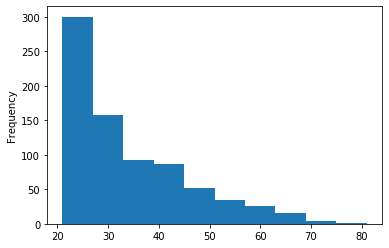

In [9]:
df['Age'].plot(kind='hist')
plt.show()

In [10]:
age_bucket=tf.feature_column.bucketized_column(age,[20,30,40,50,60,70,80])

In [11]:
fet_column=[num_preg,num_gulcose,num_bp,num_tric,num_insul,num_bim,num_pedig,age_bucket,cat_Group]

In [12]:
x_data=df.drop('Class',axis=1)

In [13]:
label=df['Class']

In [14]:
x_trian,x_test,y_train,y_test=train_test_split(x_data,label,test_size=0.30,random_state=20)

In [15]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_trian,y=y_train, batch_size=10,num_epochs=1000,shuffle=True)

In [16]:
model=tf.estimator.LinearClassifier(fet_column,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp5gae0f43', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9ec3de0c90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [17]:
model.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp5gae0f43/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 231.351
INFO:tensorflow:loss = 3.465569, step = 101 (0.438 sec)
INFO:

In [18]:
evaluate_func = tf.estimator.inputs.pandas_input_fn(x=x_test,y=y_test, batch_size=10,num_epochs=1,shuffle=True)

In [19]:
result=model.evaluate(input_fn=evaluate_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-01T14:04:01Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmp5gae0f43/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-05-01-14:04:02
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7056277, accuracy_baseline = 0.66233766, auc = 0.73525226, auc_precision_recall = 0.56421804, average_loss = 0.563938, global_step = 1000, label/mean = 0.33766234, loss = 5.4279037, precision = 0.57575756, prediction/mean = 0.37042338, recall = 0.4871795
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp5gae0f43/model.ckpt-1000


In [20]:
result

{'accuracy': 0.7056277,
 'accuracy_baseline': 0.66233766,
 'auc': 0.73525226,
 'auc_precision_recall': 0.56421804,
 'average_loss': 0.563938,
 'label/mean': 0.33766234,
 'loss': 5.4279037,
 'precision': 0.57575756,
 'prediction/mean': 0.37042338,
 'recall': 0.4871795,
 'global_step': 1000}

In [21]:
test_func = tf.estimator.inputs.pandas_input_fn(x=x_test,num_epochs=1,batch_size=10,shuffle=False)

In [22]:
prediction=model.predict(test_func)

In [23]:
list(prediction)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp5gae0f43/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-0.11413127], dtype=float32),
  'logistic': array([0.47149813], dtype=float32),
  'probabilities': array([0.52850187, 0.4714981 ], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([1.1526809], dtype=float32),
  'logistic': array([0.7600002], dtype=float32),
  'probabilities': array([0.23999977, 0.7600003 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.45697117], dtype=float32),
  'logistic': array([0.3877046], dtype=float32),
  'probabilities': array([0.6122954 , 0.38770458], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},

In [24]:
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=fet_column)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpjcztyq6c', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9ec1adf5d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [28]:
embeding_group=tf.feature_column.embedding_column('Group',4)
fet_column=[num_preg,num_gulcose,num_bp,num_tric,num_insul,num_bim,num_pedig,age_bucket,embeding_group]

In [29]:
input_func=tf.estimator.inputs.pandas_input_fn(x_trian,y_train,shuffle=True,batch_size=10,num_epochs=10)

In [30]:
dnn_model.train(input_func,steps=1000)

INFO:tensorflow:Calling model_fn.


ValueError: Items of feature_columns must be a <class 'tensorflow.python.feature_column.feature_column_v2.DenseColumn'>. You can wrap a categorical column with an embedding_column or indicator_column. Given: VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)